# 분류 실습1: 산탄데르 은행 고객 만족 예측
- 구글 : santander costomer satisfaction (캐글)

## 데이터 설명
- Target : 0(만족), 1(불만족)

### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

fit_df = pd.read_csv("./data/bank_churner.csv") # 학습을 위한 데이터 로드
eval_df = pd.read_csv("./data/test_churner.csv") # 평가를 위한 데이터 로드 - 평가데이터 경로를 입력해 주세요!!!

# cust_df = pd.read_csv("../datasets/santander/train_santander.csv", encoding='latin-1')
print('dataset shape:', fit_df.shape)
fit_df.head(3)

dataset shape: (8101, 21)


,cstno,is_churned,age,sex,dependent_num,education,marital_stat,imcome_cat,card_type,mon_on_book,...,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
0,708082083,0,45,F,3,High School,Married,Less than $40K,Blue,36,...,3,3,3544.0,NaN,1883.0,0.831,NaN,111.0,0.734,0.469
1,708083283,1,58,M,0,Unknown,Single,$40K - $60K,Blue,45,...,1,3,3421.0,2517.0,904.0,0.992,992.0,21.0,0.400,NaN
2,708084558,1,46,M,3,Doctorate,Divorced,$80K - $120K,Blue,38,...,3,3,8258.0,1771.0,6487.0,NaN,1447.0,23.0,0.000,0.214


In [10]:
fit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cstno                  8101 non-null   int64  
 1   is_churned             8101 non-null   int64  
 2   age                    8101 non-null   int64  
 3   sex                    7293 non-null   object 
 4   dependent_num          8101 non-null   int64  
 5   education              8101 non-null   object 
 6   marital_stat           8101 non-null   object 
 7   imcome_cat             6482 non-null   object 
 8   card_type              8101 non-null   object 
 9   mon_on_book            8101 non-null   int64  
 10  tot_product_count      8101 non-null   int64  
 11  months_inact_for_12m   8101 non-null   int64  
 12  contact_cnt_for_12m    8101 non-null   int64  
 13  credit_line            8101 non-null   float64
 14  tot_revol_balance      6580 non-null   float64
 15  mean

In [11]:
fit_df[fit_df['is_churned']==1].is_churned.shape[0], fit_df[fit_df['is_churned']==1].is_churned.count()

(1300, 1300)

In [12]:
print(fit_df['is_churned'].value_counts())
unsatisfied_cnt = fit_df[fit_df['is_churned'] == 1].shape[0]
total_cnt = fit_df.shape[0]
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

is_churned
0    6801
1    1300
Name: count, dtype: int64
unsatisfied 비율은 0.16


In [13]:
fit_df.describe( )

,cstno,is_churned,age,dependent_num,mon_on_book,tot_product_count,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
count,8.101000e+03,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,6580.000000,8101.000000,5666.000000,6432.000000,4851.000000,6472.000000,5575.000000
mean,7.391329e+08,0.160474,46.306382,2.334773,35.923590,3.813233,2.346871,2.450315,8636.548068,1158.693313,7476.165276,0.761457,4438.785448,64.568336,0.709951,0.274055
std,3.691912e+07,0.367068,8.022527,1.289564,8.024359,1.551838,1.014177,1.100687,9086.419557,814.653118,9080.279910,0.217645,3451.913558,23.659213,0.234484,0.275833
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,11.000000,0.000000,0.000000
25%,7.130534e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,324.750000,1341.000000,0.631000,2152.750000,44.500000,0.581000,0.023000
50%,7.178860e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1272.000000,3495.000000,0.739000,3905.000000,67.000000,0.700000,0.175000
75%,7.728464e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11128.000000,1777.250000,9942.000000,0.862000,4754.250000,80.000000,0.818000,0.501000
max,8.283431e+08,1.000000,70.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,2.594000,18484.000000,139.000000,3.571000,0.999000


##### 데이터 변환

In [2]:
# 원-핫 인코딩 처리 
# ----------------
def encode_onehot(df):
    '''
        데이터프레임의 object type 컬럼을 원-핫 인코딩하는 함수
        
        Args:
            df (df) : DataFrame
        Return:
            DataFrame
    '''
    catcols = df.select_dtypes(exclude = ['int64','float64']).columns
    df = pd.get_dummies(df, columns = catcols)
    
    return df

def test_transform(df):
    df = df.drop('cstno', axis=1)
    df = df.drop('sex', axis=1)
    # after_drop_cnt=len(df)
    df['imcome_cat']=df['imcome_cat'].replace({'Less than $40K':40000, '$40K - $60K':50000, '$60K - $80K':70000, '$80K - $120K':100000, '$120K +':120000, 'Unknown':63000})


    # 결측치 처리
    # ----------
    # df = df.fillna(df.mean(numeric_only=True))
    df = df.groupby(['marital_stat']).apply(lambda x: x.fillna(x.mean(numeric_only=True)))
    df.dropna(axis=0, inplace=True)
    # after_drop_cnt=len(df)


    # One-Hot Encoding
    # ----------------
    df = encode_onehot(df)

    return df

fit_df = test_transform(fit_df)
eval_df = test_transform(eval_df)


In [3]:
# var3 피처 값 대체 및 ID 피처 드롭
# cust_df['var3'].replace(-999999, 2, inplace=True)
# cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리

X_features = fit_df.drop(['is_churned'],axis=1)
y_labels = fit_df['is_churned']

X_eval = eval_df.drop(['is_churned'],axis=1)
y_eval = eval_df['is_churned']


In [4]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

def proc_smote(X_new, y):
    #Model Training
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE

    # X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,stratify=y,random_state=0)
    X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,stratify=y,random_state=0)

    sm = SMOTE(sampling_strategy='auto', random_state=42)
    # X_train, y_train=sm.fit_resample(X_train,y_train)
    X_train, y_train=sm.fit_resample(X_new,y)
    
    return X_train, y_train, X_test, y_test


def proc_normalization(X_tr, X_val, X_eval):
    scaler=StandardScaler()
    # scaler = QuantileTransformer()
    # scaler = PowerTransformer()
    X_tr=scaler.fit_transform(X_tr)
    X_val=scaler.transform(X_val)
    X_eval = scaler.transform(X_eval)
    
    return X_tr, X_val, X_eval


def select_feature(df, y, chosen_model):

    np.random.seed(42)    
    
    available_models = {
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100),
    # 'RandomForest': RandomForestClassifier(n_estimators=100),
    # 'KNN': KNeighborsClassifier(n_neighbors=5),
    # 'RFE': RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=13),
    # # 'LGBMC': LGBMClassifier(),
    # 'LGBMC': LGBMClassifier(n_estimators=700, random_state=42, boosting_type='GOSS'),
    # 'LGBMR': LGBMRegressor(),
    # 'Xg Boost':XGBClassifier(booster='gbtree', importance_type='gain', eval_metric='auc'),
    }

    # Create the selected model
    clf = available_models[chosen_model]

    clf = clf.fit(df.values, y)                                     # Train

    if chosen_model == 'LGBMC' or chosen_model == 'LGBMR': 
        feature_importances = clf.booster_.feature_importance(importance_type="gain")
    else:        
        feature_importances = clf.feature_importances_


    chosen_model = SelectFromModel(clf, prefit=True)
    X_df = chosen_model.transform(df.values) 
    selected_feature_indices = chosen_model.get_support(indices=True)

    selected_columns = df.columns[selected_feature_indices]         # Get the indices of the selected features
    
    return X_df, selected_columns





X_new, selected_columns = select_feature(X_features, y_labels, 'ExtraTrees')
# print(selected_columns)
X_eval = X_eval[selected_columns]


# Train and Test 데이터 생성 및 가공
# ---------------------------------
X_tr, y_tr, X_val, y_val = proc_smote(X_new, y_labels)

print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape, X_eval.values.shape)


# Evaluation 데이터 생성 및 가공
# ---------------------------------
X_tr, X_val, X_eval = proc_normalization(X_tr, X_val, X_eval.values)   

(13602, 13) (2026, 13) (13602,) (2026,) (2026, 13)


In [ ]:
'''
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
#                                                     test_size=0.2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.25, random_state=0, stratify=y_labels)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)
'''

"\nfrom sklearn.model_selection import train_test_split\n\n# X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,\n#                                                     test_size=0.2, random_state=0)\n\nX_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,\n                                                    test_size=0.25, random_state=0, stratify=y_labels)\n\ntrain_cnt = y_train.count()\ntest_cnt = y_test.count()\nprint('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))\n\nprint(' 학습 세트 레이블 값 분포 비율')\nprint(y_train.value_counts()/train_cnt)\nprint('\n 테스트 세트 레이블 값 분포 비율')\nprint(y_test.value_counts()/test_cnt)\n"

In [ ]:
'''
from sklearn.model_selection import train_test_split

# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리. 
# X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
#                                                     test_size=0.3, random_state=0, stratify=y_train)

X_tr, X_val, y_tr, y_val = train_test_split(X_features, y_labels,
                                                    test_size=0.25, random_state=0, stratify=y_labels)

'''                                                    

### XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [5]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

print(f'X_tr:{X_tr.shape}, y_tr:{y_tr.shape}, X_val:{X_val.shape}, y_val:{y_val.shape}, X_eval:{X_eval.shape}, y_eval: {y_eval.shape}')
# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_eval, xgb_clf.predict_proba(X_eval)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))


X_tr:(13602, 13), y_tr:(13602,), X_val:(2026, 13), y_val:(2026,), X_eval:(2026, 13), y_eval: (2026,)
[0]	validation_0-auc:0.93958	validation_1-auc:0.89220
[1]	validation_0-auc:0.94652	validation_1-auc:0.89095
[2]	validation_0-auc:0.94721	validation_1-auc:0.89400
[3]	validation_0-auc:0.95212	validation_1-auc:0.89522
[4]	validation_0-auc:0.95922	validation_1-auc:0.90013
[5]	validation_0-auc:0.96142	validation_1-auc:0.90222
[6]	validation_0-auc:0.96412	validation_1-auc:0.90569
[7]	validation_0-auc:0.96755	validation_1-auc:0.91345
[8]	validation_0-auc:0.96920	validation_1-auc:0.91611
[9]	validation_0-auc:0.96996	validation_1-auc:0.91748
[10]	validation_0-auc:0.97210	validation_1-auc:0.92011
[11]	validation_0-auc:0.97288	validation_1-auc:0.92151
[12]	validation_0-auc:0.97512	validation_1-auc:0.92633
[13]	validation_0-auc:0.97626	validation_1-auc:0.92864
[14]	validation_0-auc:0.97770	validation_1-auc:0.93150
[15]	validation_0-auc:0.97863	validation_1-auc:0.93262
[16]	validation_0-auc:0.97958

In [6]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth'])
                           , min_child_weight=int(search_space['min_child_weight'])
                            , colsample_bytree=search_space['colsample_bytree']
                            , learning_rate=search_space['learning_rate']
                           )
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_features):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_features.iloc[tr_index], y_labels.iloc[tr_index]
        X_val, y_val = X_features.iloc[val_index], y_labels.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc'
                   , eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)

In [65]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[0]	validation_0-auc:0.91066	validation_1-auc:0.86103 
[1]	validation_0-auc:0.93163	validation_1-auc:0.88683 
[2]	validation_0-auc:0.94610	validation_1-auc:0.90274 
[3]	validation_0-auc:0.95053	validation_1-auc:0.90392 
[4]	validation_0-auc:0.95235	validation_1-auc:0.90414 
[5]	validation_0-auc:0.96396	validation_1-auc:0.92733 
[6]	validation_0-auc:0.96484	validation_1-auc:0.93069 
[7]	validation_0-auc:0.96488	validation_1-auc:0.92820 
[8]	validation_0-auc:0.96522	validation_1-auc:0.92808 
[9]	validation_0-auc:0.96533	validation_1-auc:0.92752 
[10]	validation_0-auc:0.96531	validation_1-auc:0.92753
[11]	validation_0-auc:0.96612	validation_1-auc:0.92742
[12]	validation_0-auc:0.96819	validation_1-auc:0.92765
[13]	validation_0-auc:0.96897	validation_1-auc:0.92807
[14]	validation_0-auc:0.96920	validation_1-auc:0.92803
[15]	validation_0-auc:0.97046	validation_1-auc:0.93061
[16]	validation_0-auc:0.97201	validation_1-auc:0.93176
[17]	validation_0-auc:0.97225	validation_1-auc:0.93258
[18]	valid

KeyboardInterrupt: 

In [ ]:
# n_estimators를 500증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']), 
                        colsample_bytree=round(best['colsample_bytree'], 5)   
                       )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_eval, xgb_clf.predict_proba(X_eval)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.85646	validation_1-auc:0.84642
[1]	validation_0-auc:0.89857	validation_1-auc:0.89105
[2]	validation_0-auc:0.92341	validation_1-auc:0.90985
[3]	validation_0-auc:0.95871	validation_1-auc:0.93698
[4]	validation_0-auc:0.96596	validation_1-auc:0.94081
[5]	validation_0-auc:0.97199	validation_1-auc:0.94513
[6]	validation_0-auc:0.97288	validation_1-auc:0.94866
[7]	validation_0-auc:0.97579	validation_1-auc:0.95061
[8]	validation_0-auc:0.97816	validation_1-auc:0.95121
[9]	validation_0-auc:0.97950	validation_1-auc:0.95293
[10]	validation_0-auc:0.98067	validation_1-auc:0.95349
[11]	validation_0-auc:0.98173	validation_1-auc:0.95377
[12]	validation_0-auc:0.98434	validation_1-auc:0.95466
[13]	validation_0-auc:0.98518	validation_1-auc:0.95556
[14]	validation_0-auc:0.98672	validation_1-auc:0.95685
[15]	validation_0-auc:0.98725	validation_1-auc:0.95722
[16]	validation_0-auc:0.98795	validation_1-auc:0.95772
[17]	validation_0-auc:0.98867	validation_1-auc:0.95787
[18]	validation_0-au

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

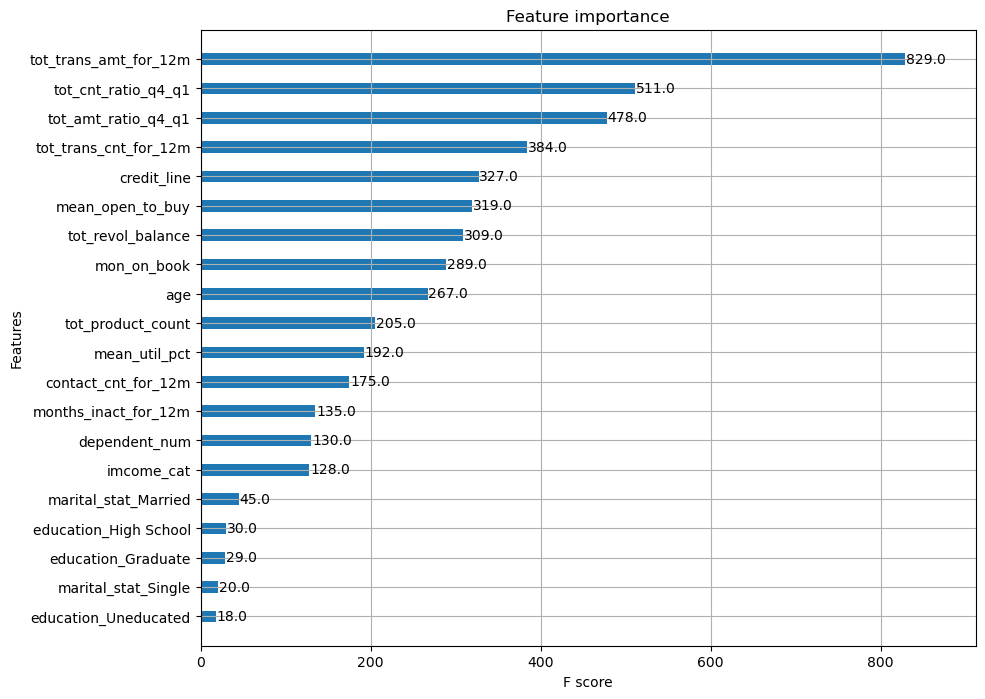

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [8]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_eval, lgbm_clf.predict_proba(X_eval)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.930985	training's binary_logloss: 0.633229	valid_1's auc: 0.880778	valid_1's binary_logloss: 0.638821
[2]	training's auc: 0.944968	training's binary_logloss: 0.582429	valid_1's auc: 0.879523	valid_1's binary_logloss: 0.594025
[3]	training's auc: 0.951526	training's binary_logloss: 0.540028	valid_1's auc: 0.887314	valid_1's binary_logloss: 0.556152
[4]	training's auc: 0.960266	training's binary_logloss: 0.50177	valid_1's auc: 0.894133	valid_1's binary_logloss: 0.522336
[5]	training's auc: 0.967995	training's binary_logloss: 0.467367	valid_1's auc: 0.910042	valid_1's binary_logloss: 0.490625
[6]	training's auc: 0.971304	training's binary_logloss: 0.437411	valid_1's auc: 0.916152	valid_1's binary_logloss: 0.463631
[7]	training's auc: 0.97382	training's binary_logloss: 0.411624	valid_1's auc: 0.922713	valid_1's binary_logloss: 0.440162
[8]	training's auc: 0.976744	training's binary_logloss: 0.388405	valid_1's auc: 0.926782	valid_1's binary_logloss: 0.419377
[9]	traini

In [9]:
from hyperopt import hp

lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [19]:
from imblearn.over_sampling import SMOTE

def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_features):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_features.iloc[tr_index], y_labels.iloc[tr_index]
        X_val, y_val = X_features.iloc[val_index], y_labels.iloc[val_index]


        # SMOTE 적용
        # ----------
        sm = SMOTE(sampling_strategy='auto', random_state=42)
        X_tr, y_tr=sm.fit_resample(X_tr,y_tr)

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [20]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[1]	training's auc: 0.940212	training's binary_logloss: 0.678425	valid_1's auc: 0.886272	valid_1's binary_logloss: 0.680029
[2]	training's auc: 0.942753	training's binary_logloss: 0.664461	valid_1's auc: 0.885575	valid_1's binary_logloss: 0.667607
[3]	training's auc: 0.9432	training's binary_logloss: 0.651033	valid_1's auc: 0.885843	valid_1's binary_logloss: 0.655519
[4]	training's auc: 0.943601	training's binary_logloss: 0.638427	valid_1's auc: 0.888377	valid_1's binary_logloss: 0.644258
[5]	training's auc: 0.94363	training's binary_logloss: 0.626116	valid_1's auc: 0.887605	valid_1's binary_logloss: 0.63319
[6]	training's auc: 0.945199	training's binary_logloss: 0.614541	valid_1's auc: 0.889786	valid_1's binary_logloss: 0.622927
[7]	training's auc: 0.945983	training's binary_logloss: 0.603366	valid_1's auc: 0.891859	valid_1's binary_logloss: 0.612645
[8]	training's auc: 0.947761	training's binary_logloss: 0.592771	valid_1's auc: 0.893045	valid_1's binary_logloss: 0.603529
[9]	training

In [22]:
lgbm_clf =  LGBMClassifier(n_estimators=700, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_eval, lgbm_clf.predict_proba(X_eval)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.94059	training's binary_logloss: 0.60812	valid_1's auc: 0.890549	valid_1's binary_logloss: 0.615267
[2]	training's auc: 0.95523	training's binary_logloss: 0.541426	valid_1's auc: 0.896627	valid_1's binary_logloss: 0.556714
[3]	training's auc: 0.964697	training's binary_logloss: 0.486253	valid_1's auc: 0.906485	valid_1's binary_logloss: 0.507311
[4]	training's auc: 0.971967	training's binary_logloss: 0.438581	valid_1's auc: 0.915147	valid_1's binary_logloss: 0.464844
[5]	training's auc: 0.975094	training's binary_logloss: 0.400523	valid_1's auc: 0.923024	valid_1's binary_logloss: 0.429041
[6]	training's auc: 0.978887	training's binary_logloss: 0.368413	valid_1's auc: 0.932277	valid_1's binary_logloss: 0.399711
[7]	training's auc: 0.981114	training's binary_logloss: 0.338696	valid_1's auc: 0.935774	valid_1's binary_logloss: 0.373518
[8]	training's auc: 0.98266	training's binary_logloss: 0.314315	valid_1's auc: 0.93992	valid_1's binary_logloss: 0.351437
[9]	training'